## 1. Importación de Librerías y Datos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [2]:
# Cargar el dataset del Titanic
df = pd.read_csv('titanic.csv')

# Información general del dataset
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Dimensiones: {df.shape}")
print(f"\nPrimeras 5 filas:")
df.head()

=== INFORMACIÓN GENERAL DEL DATASET ===
Dimensiones: (891, 12)

Primeras 5 filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Información detallada del dataset
print("=== INFORMACIÓN DETALLADA ===")
df.info()

=== INFORMACIÓN DETALLADA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Descripción estadística del dataset
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
df.describe()

=== ESTADÍSTICAS DESCRIPTIVAS ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Análisis Univariado de la Edad de los Pasajeros

In [5]:
# Análisis de valores faltantes en la edad
print("=== ANÁLISIS DE LA VARIABLE EDAD ===")
print(f"Total de registros: {len(df)}")
print(f"Valores faltantes en Age: {df['Age'].isnull().sum()}")
print(f"Porcentaje de valores faltantes: {(df['Age'].isnull().sum() / len(df)) * 100:.2f}%")
print(f"Valores disponibles para análisis: {df['Age'].notna().sum()}")

=== ANÁLISIS DE LA VARIABLE EDAD ===
Total de registros: 891
Valores faltantes en Age: 177
Porcentaje de valores faltantes: 19.87%
Valores disponibles para análisis: 714


In [6]:
# Estadísticas descriptivas de la edad
age_stats = df['Age'].describe()
print("=== ESTADÍSTICAS DESCRIPTIVAS DE LA EDAD ===")
print(age_stats)
print(f"\nModa: {df['Age'].mode().iloc[0]:.2f} años")
print(f"Desviación estándar: {df['Age'].std():.2f} años")
print(f"Rango: {df['Age'].max() - df['Age'].min():.2f} años")
print(f"Coeficiente de variación: {(df['Age'].std() / df['Age'].mean()) * 100:.2f}%")

=== ESTADÍSTICAS DESCRIPTIVAS DE LA EDAD ===
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Moda: 24.00 años
Desviación estándar: 14.53 años
Rango: 79.58 años
Coeficiente de variación: 48.91%


In [7]:
# Análisis de cuartiles y percentiles
print("=== ANÁLISIS DE CUARTILES Y PERCENTILES ===")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(df['Age'].dropna(), p)
    print(f"Percentil {p}: {value:.2f} años")

=== ANÁLISIS DE CUARTILES Y PERCENTILES ===
Percentil 10: 14.00 años
Percentil 25: 20.12 años
Percentil 50: 28.00 años
Percentil 75: 38.00 años
Percentil 90: 50.00 años
Percentil 95: 56.00 años
Percentil 99: 65.87 años


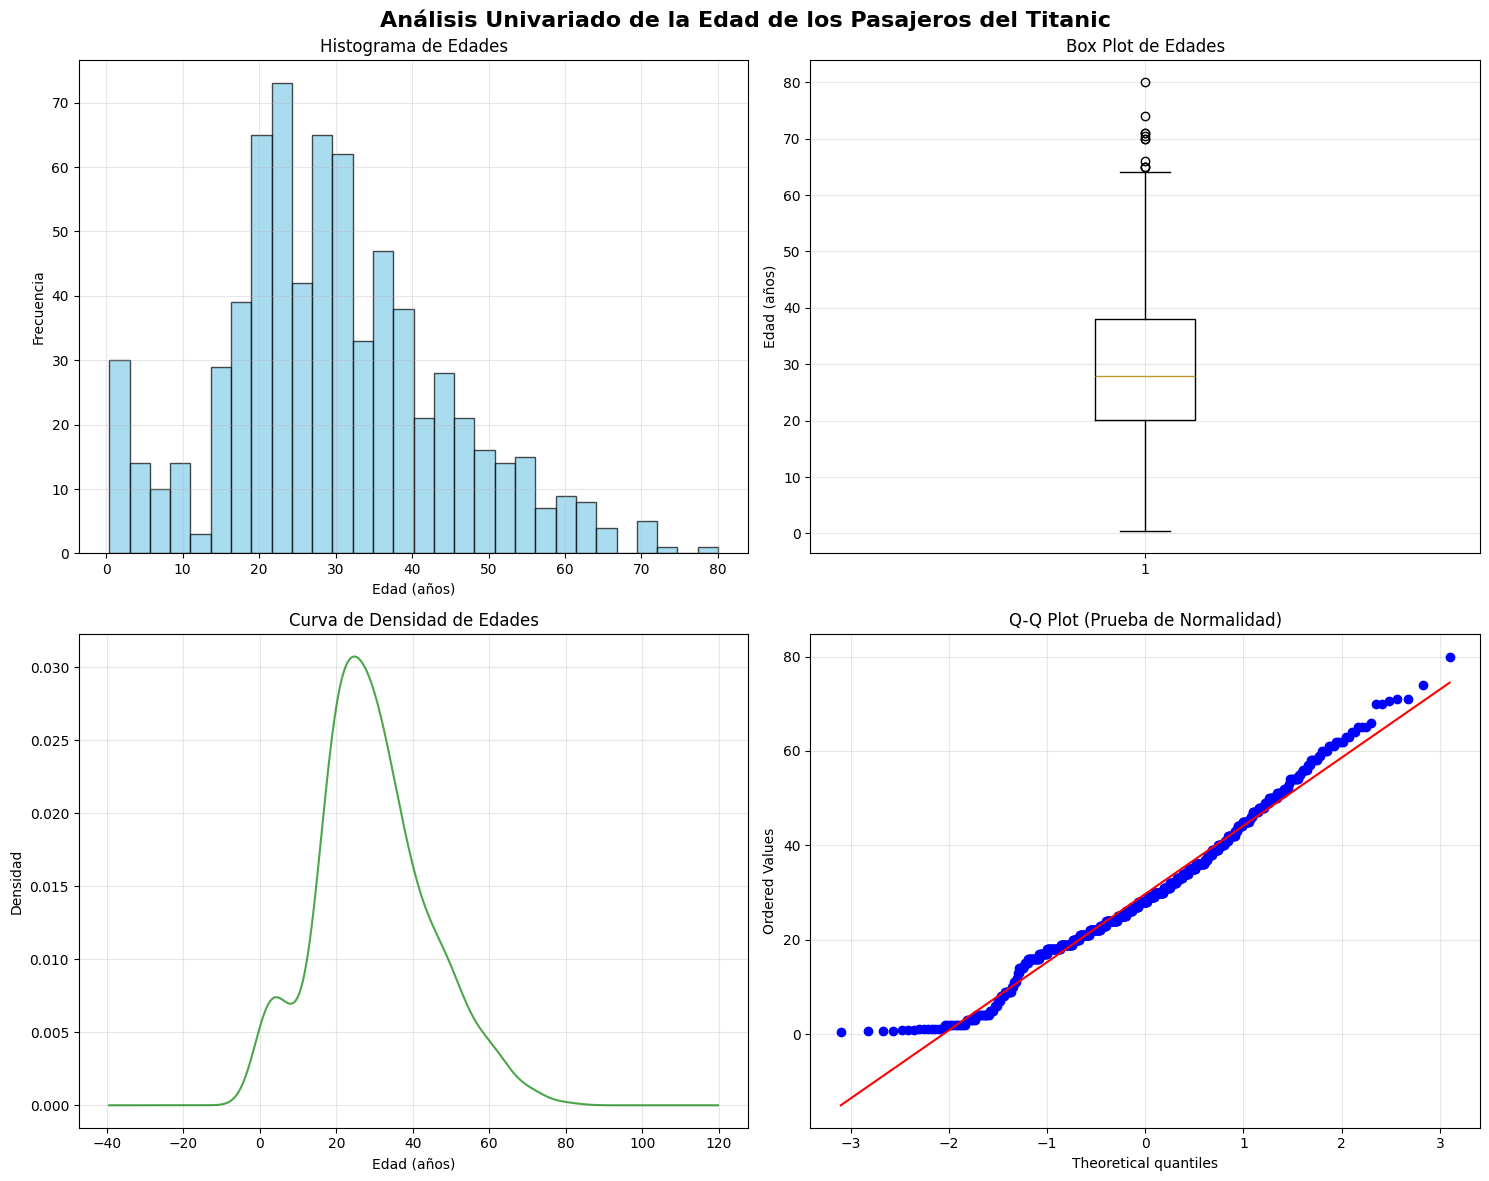

In [8]:
# Visualización de la distribución de la edad
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Univariado de la Edad de los Pasajeros del Titanic', fontsize=16, fontweight='bold')

# plt.hist(df['Age'].dropna(), bins=30, color='skyblue', alpha=0.7, edgecolor='black')
# plt.set_title('Histograma de Edades')
# plt.set_xlabel('Edad (años)')
# plt.set_ylabel('Frecuencia')
# plt.grid(True, alpha=0.3)
# plt.show()

# Histograma
axes[0, 0].hist(df['Age'].dropna(), bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Histograma de Edades')
axes[0, 0].set_xlabel('Edad (años)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(df['Age'].dropna(), vert=True)
axes[0, 1].set_title('Box Plot de Edades')
axes[0, 1].set_ylabel('Edad (años)')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico de densidad
df['Age'].dropna().plot(kind='density', ax=axes[1, 0], color='green', alpha=0.7)
axes[1, 0].set_title('Curva de Densidad de Edades')
axes[1, 0].set_xlabel('Edad (años)')
axes[1, 0].set_ylabel('Densidad')
axes[1, 0].grid(True, alpha=0.3)

# Q-Q Plot para normalidad
stats.probplot(df['Age'].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Prueba de Normalidad)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ANÁLISIS POR GRUPOS DE EDAD ===
Grupo_Edad
Niños (0-12)             68
Adolescentes (13-18)     45
Jóvenes (19-30)         271
Adultos (31-50)         256
Maduros (51-65)          63
Mayores (65+)            11
Name: count, dtype: int64

Porcentajes por grupo:
Grupo_Edad
Niños (0-12)             9.52
Adolescentes (13-18)     6.30
Jóvenes (19-30)         37.96
Adultos (31-50)         35.85
Maduros (51-65)          8.82
Mayores (65+)            1.54
Name: count, dtype: float64


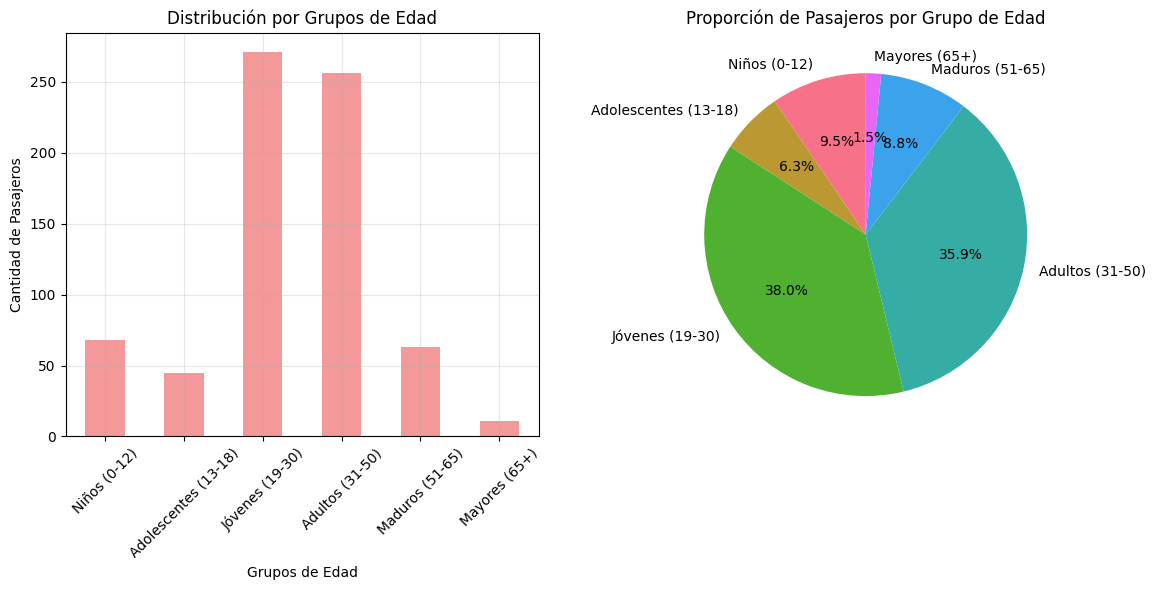

In [9]:
# Análisis de grupos de edad
print("=== ANÁLISIS POR GRUPOS DE EDAD ===")

# Crear grupos de edad
df_age = df.dropna(subset=['Age']).copy()
bins = [0, 12, 18, 30, 50, 65, 100]
labels = ['Niños (0-12)', 'Adolescentes (13-18)', 'Jóvenes (19-30)',
          'Adultos (31-50)', 'Maduros (51-65)', 'Mayores (65+)']
df_age['Grupo_Edad'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)

# Contar por grupos
grupos_edad = df_age['Grupo_Edad'].value_counts().sort_index()
print(grupos_edad)
print(f"\nPorcentajes por grupo:")
print((grupos_edad / grupos_edad.sum() * 100).round(2))

# Visualizar grupos de edad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
grupos_edad.plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Distribución por Grupos de Edad')
plt.xlabel('Grupos de Edad')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(grupos_edad.values, labels=grupos_edad.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Pasajeros por Grupo de Edad')

plt.tight_layout()
plt.show()

## 3. Análisis Univariado del Valor del Pasaje

In [10]:
# Análisis de valores faltantes en el precio del pasaje
print("=== ANÁLISIS DE LA VARIABLE FARE (PRECIO DEL PASAJE) ===")
print(f"Total de registros: {len(df)}")
print(f"Valores faltantes en Fare: {df['Fare'].isnull().sum()}")
print(f"Porcentaje de valores faltantes: {(df['Fare'].isnull().sum() / len(df)) * 100:.2f}%")
print(f"Valores disponibles para análisis: {df['Fare'].notna().sum()}")

=== ANÁLISIS DE LA VARIABLE FARE (PRECIO DEL PASAJE) ===
Total de registros: 891
Valores faltantes en Fare: 0
Porcentaje de valores faltantes: 0.00%
Valores disponibles para análisis: 891


In [11]:
# Estadísticas descriptivas del precio del pasaje
fare_stats = df['Fare'].describe()
print("=== ESTADÍSTICAS DESCRIPTIVAS DEL PRECIO DEL PASAJE ===")
print(fare_stats)
print(f"\nModa: ${df['Fare'].mode().iloc[0]:.2f}")
print(f"Desviación estándar: ${df['Fare'].std():.2f}")
print(f"Rango: ${df['Fare'].max() - df['Fare'].min():.2f}")
print(f"Coeficiente de variación: {(df['Fare'].std() / df['Fare'].mean()) * 100:.2f}%")

=== ESTADÍSTICAS DESCRIPTIVAS DEL PRECIO DEL PASAJE ===
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Moda: $8.05
Desviación estándar: $49.69
Rango: $512.33
Coeficiente de variación: 154.31%


In [12]:
# Análisis de cuartiles y percentiles para Fare
print("=== ANÁLISIS DE CUARTILES Y PERCENTILES DEL PRECIO ===")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(df['Fare'].dropna(), p)
    print(f"Percentil {p}: ${value:.2f}")

# Identificar valores atípicos
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]['Fare']
print(f"\n=== VALORES ATÍPICOS ===")
print(f"Límite inferior: ${lower_bound:.2f}")
print(f"Límite superior: ${upper_bound:.2f}")
print(f"Número de valores atípicos: {len(outliers)}")
print(f"Porcentaje de valores atípicos: {(len(outliers) / len(df)) * 100:.2f}%")

=== ANÁLISIS DE CUARTILES Y PERCENTILES DEL PRECIO ===
Percentil 10: $7.55
Percentil 25: $7.91
Percentil 50: $14.45
Percentil 75: $31.00
Percentil 90: $77.96
Percentil 95: $112.08
Percentil 99: $249.01

=== VALORES ATÍPICOS ===
Límite inferior: $-26.72
Límite superior: $65.63
Número de valores atípicos: 116
Porcentaje de valores atípicos: 13.02%


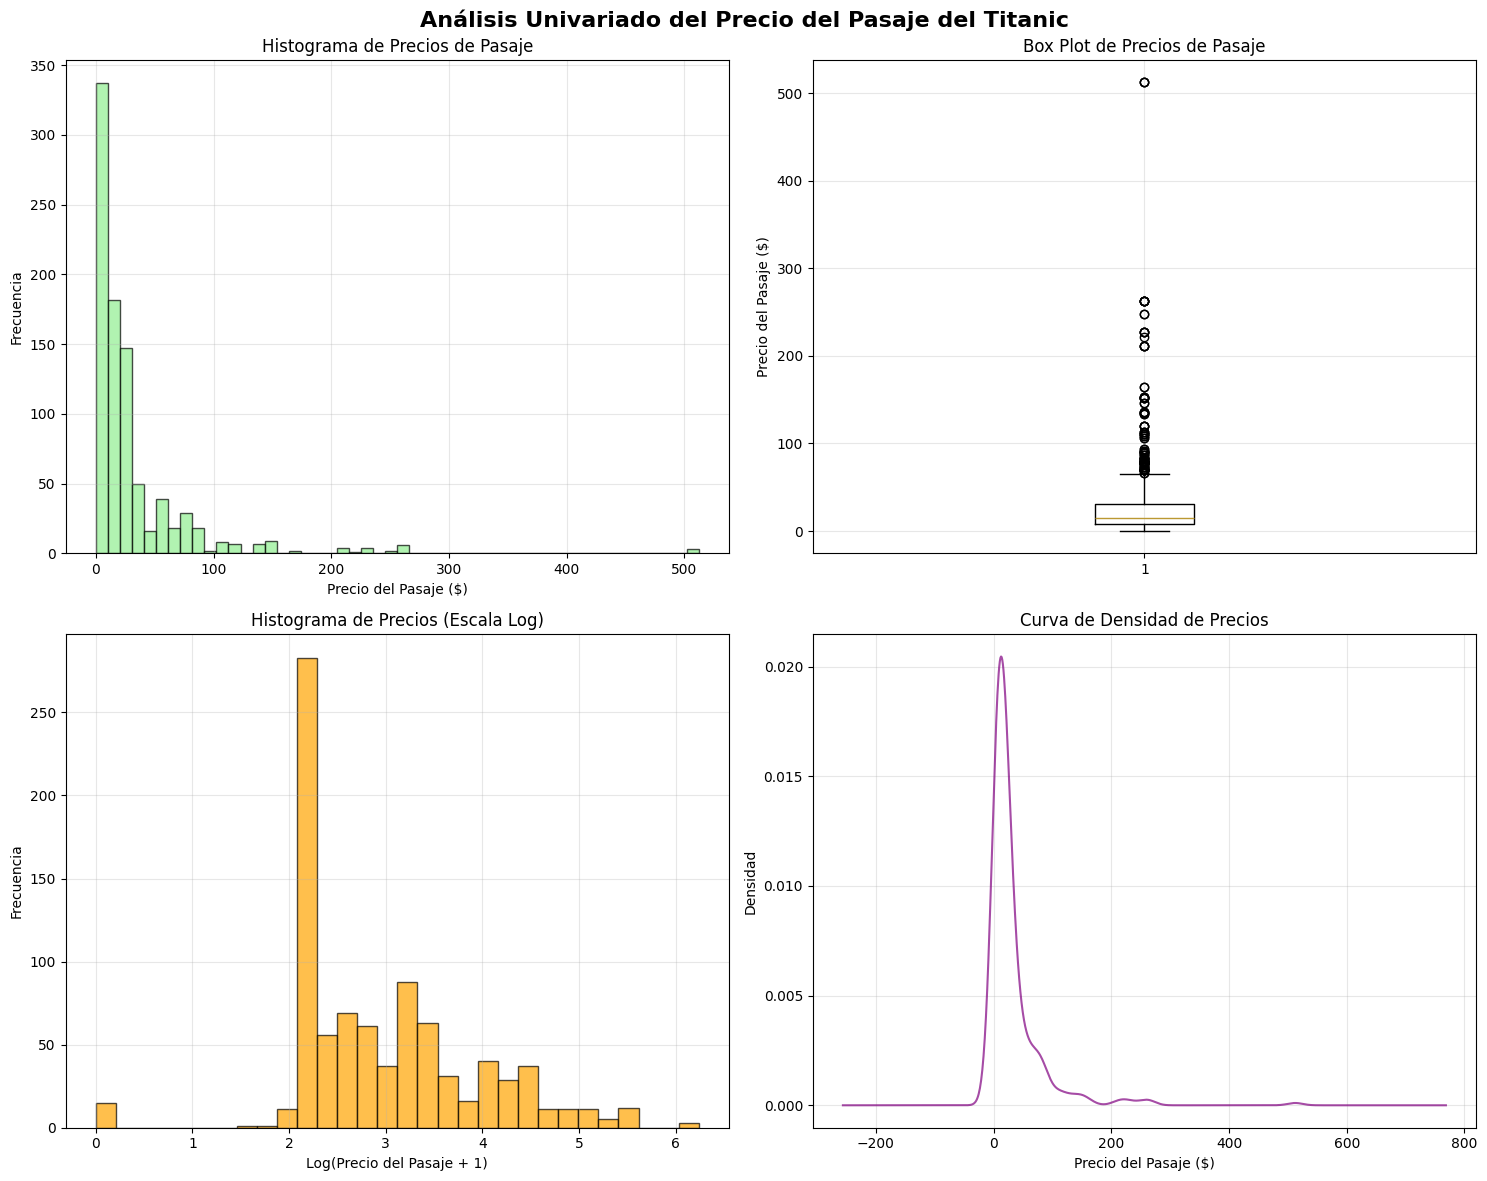

In [13]:
# Visualización de la distribución del precio del pasaje
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Univariado del Precio del Pasaje del Titanic', fontsize=16, fontweight='bold')

# Histograma
axes[0, 0].hist(df['Fare'].dropna(), bins=50, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Histograma de Precios de Pasaje')
axes[0, 0].set_xlabel('Precio del Pasaje ($)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(df['Fare'].dropna(), vert=True)
axes[0, 1].set_title('Box Plot de Precios de Pasaje')
axes[0, 1].set_ylabel('Precio del Pasaje ($)')
axes[0, 1].grid(True, alpha=0.3)

# Histograma con escala logarítmica
fare_log = np.log1p(df['Fare'].dropna())  # log(1+x) para evitar problemas con ceros
axes[1, 0].hist(fare_log, bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Histograma de Precios (Escala Log)')
axes[1, 0].set_xlabel('Log(Precio del Pasaje + 1)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].grid(True, alpha=0.3)

# Gráfico de densidad
df['Fare'].dropna().plot(kind='density', ax=axes[1, 1], color='purple', alpha=0.7)
axes[1, 1].set_title('Curva de Densidad de Precios')
axes[1, 1].set_xlabel('Precio del Pasaje ($)')
axes[1, 1].set_ylabel('Densidad')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ANÁLISIS POR RANGOS DE PRECIOS ===
Rango_Precio
Muy Bajo (0-10)       336
Bajo (10-25)          221
Medio (25-50)         173
Alto (50-100)         108
Muy Alto (100-200)     33
Lujo (200+)            20
Name: count, dtype: int64

Porcentajes por rango:
Rango_Precio
Muy Bajo (0-10)       37.71
Bajo (10-25)          24.80
Medio (25-50)         19.42
Alto (50-100)         12.12
Muy Alto (100-200)     3.70
Lujo (200+)            2.24
Name: count, dtype: float64


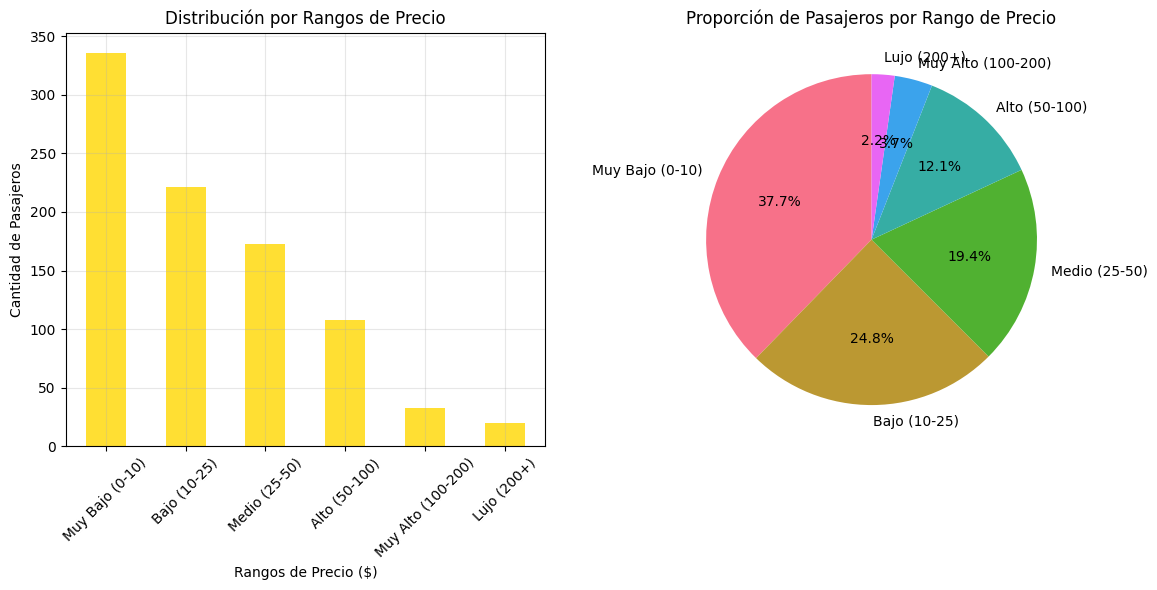

In [14]:
# Análisis de rangos de precios
print("=== ANÁLISIS POR RANGOS DE PRECIOS ===")

# Crear rangos de precios
df_fare = df.dropna(subset=['Fare']).copy()
bins_fare = [0, 10, 25, 50, 100, 200, 600]
labels_fare = ['Muy Bajo (0-10)', 'Bajo (10-25)', 'Medio (25-50)',
               'Alto (50-100)', 'Muy Alto (100-200)', 'Lujo (200+)']
df_fare['Rango_Precio'] = pd.cut(df_fare['Fare'], bins=bins_fare, labels=labels_fare, right=False)

# Contar por rangos
rangos_precio = df_fare['Rango_Precio'].value_counts().sort_index()
print(rangos_precio)
print(f"\nPorcentajes por rango:")
print((rangos_precio / rangos_precio.sum() * 100).round(2))

# Visualizar rangos de precios
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
rangos_precio.plot(kind='bar', color='gold', alpha=0.8)
plt.title('Distribución por Rangos de Precio')
plt.xlabel('Rangos de Precio ($)')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(rangos_precio.values, labels=rangos_precio.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Pasajeros por Rango de Precio')

plt.tight_layout()
plt.show()

## 4. Pruebas de Normalidad

In [15]:
# Pruebas de normalidad para ambas variables
from scipy.stats import shapiro, normaltest, jarque_bera

print("=== PRUEBAS DE NORMALIDAD ===")

# Para la edad
age_clean = df['Age'].dropna()
print("\nVARIABLE: EDAD")
print("-" * 40)

# Shapiro-Wilk (para muestras pequeñas)
if len(age_clean) <= 5000:
    shapiro_stat, shapiro_p = shapiro(age_clean.sample(5000) if len(age_clean) > 5000 else age_clean)
    print(f"Shapiro-Wilk: estadístico={shapiro_stat:.4f}, p-valor={shapiro_p:.4f}")

# D'Agostino y Pearson
dagostino_stat, dagostino_p = normaltest(age_clean)
print(f"D'Agostino-Pearson: estadístico={dagostino_stat:.4f}, p-valor={dagostino_p:.4f}")

# Para el precio del pasaje
fare_clean = df['Fare'].dropna()
print("\nVARIABLE: PRECIO DEL PASAJE")
print("-" * 40)

# Shapiro-Wilk
if len(fare_clean) <= 5000:
    shapiro_stat_f, shapiro_p_f = shapiro(fare_clean.sample(5000) if len(fare_clean) > 5000 else fare_clean)
    print(f"Shapiro-Wilk: estadístico={shapiro_stat_f:.4f}, p-valor={shapiro_p_f:.4f}")

# D'Agostino y Pearson
dagostino_stat_f, dagostino_p_f = normaltest(fare_clean)
print(f"D'Agostino-Pearson: estadístico={dagostino_stat_f:.4f}, p-valor={dagostino_p_f:.4f}")

print("\n=== INTERPRETACIÓN ===")
print("p-valor < 0.05: Rechazar H0 (no es normal)")
print("p-valor >= 0.05: No rechazar H0 (puede ser normal)")

=== PRUEBAS DE NORMALIDAD ===

VARIABLE: EDAD
----------------------------------------
Shapiro-Wilk: estadístico=0.9815, p-valor=0.0000
D'Agostino-Pearson: estadístico=18.1050, p-valor=0.0001

VARIABLE: PRECIO DEL PASAJE
----------------------------------------
Shapiro-Wilk: estadístico=0.5219, p-valor=0.0000
D'Agostino-Pearson: estadístico=904.5873, p-valor=0.0000

=== INTERPRETACIÓN ===
p-valor < 0.05: Rechazar H0 (no es normal)
p-valor >= 0.05: No rechazar H0 (puede ser normal)


## 5. Resumen y Insights del Análisis

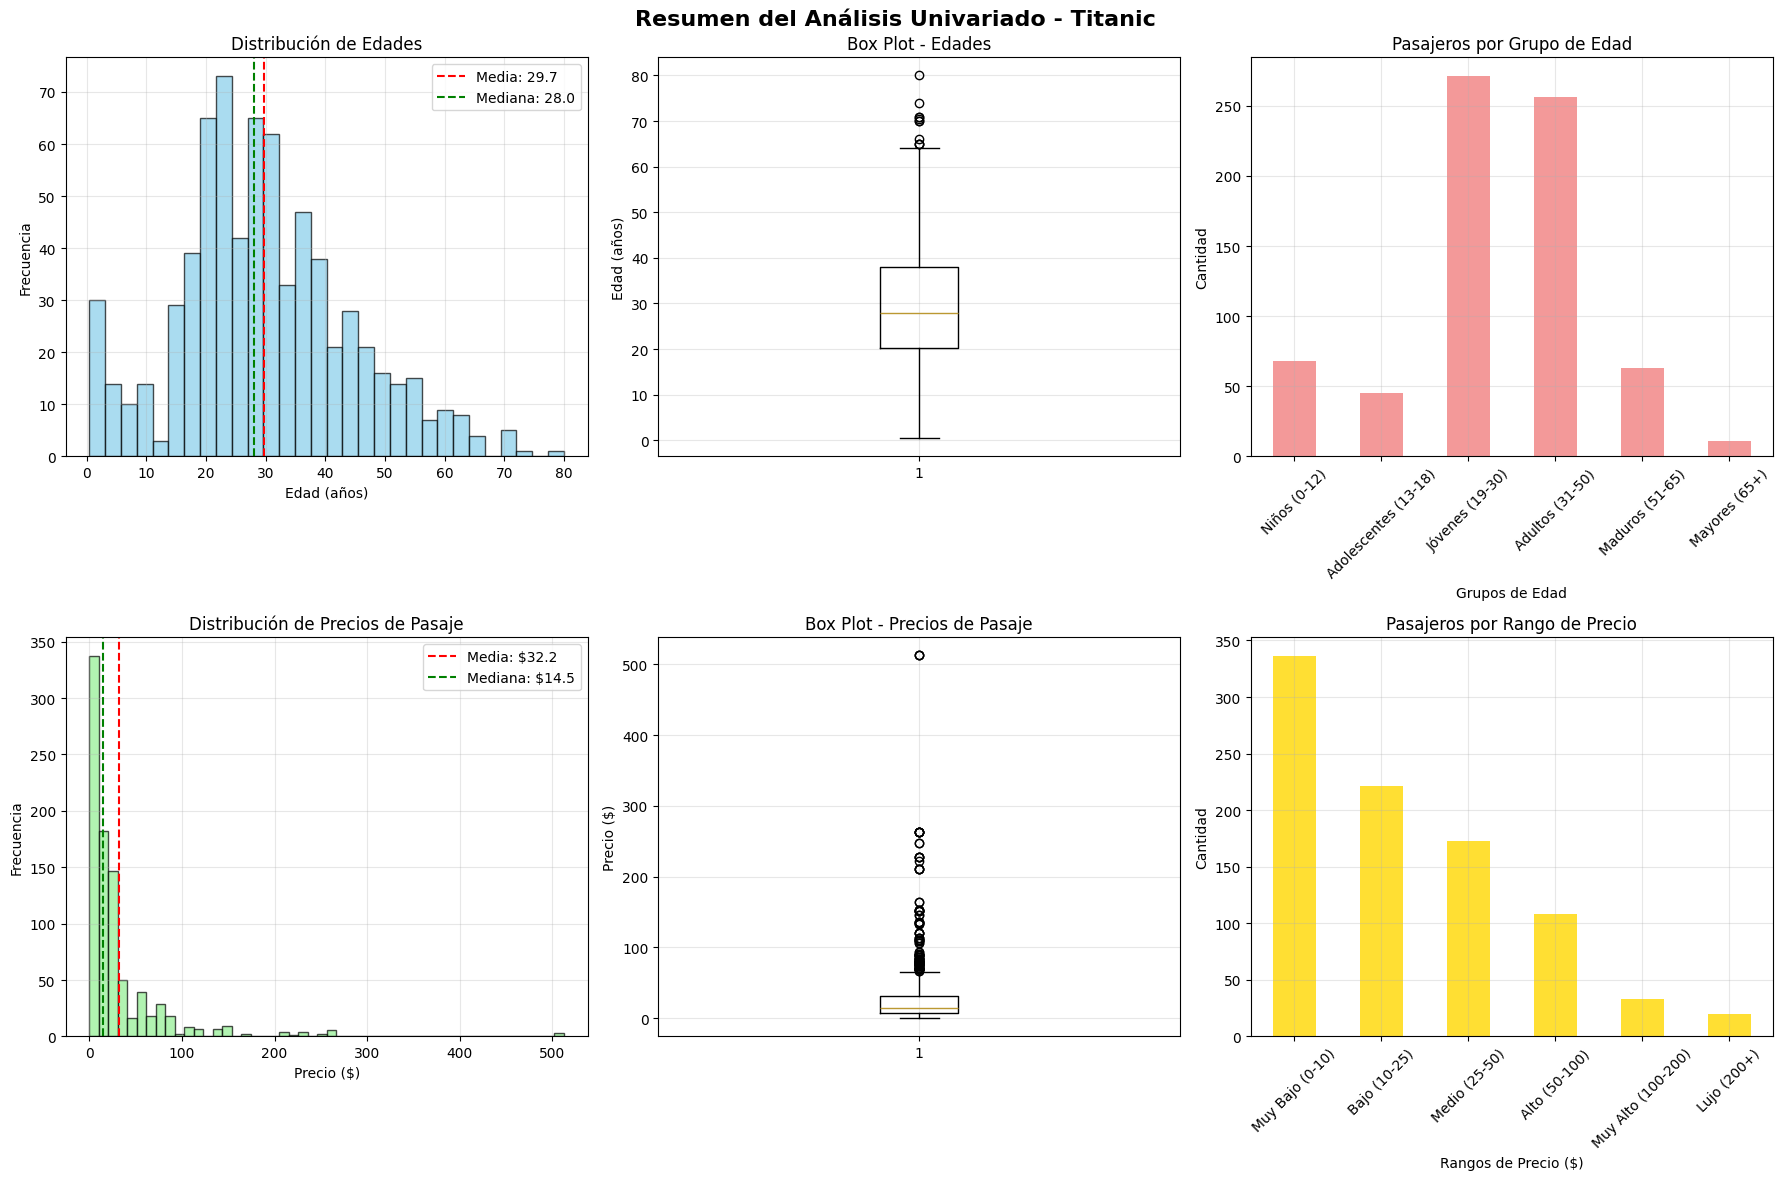

In [16]:
# Crear un resumen visual conjunto
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Resumen del Análisis Univariado - Titanic', fontsize=16, fontweight='bold')

# Edad - Histograma
axes[0, 0].hist(df['Age'].dropna(), bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribución de Edades')
axes[0, 0].set_xlabel('Edad (años)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Media: {df["Age"].mean():.1f}')
axes[0, 0].axvline(df['Age'].median(), color='green', linestyle='--', label=f'Mediana: {df["Age"].median():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Edad - Box Plot
axes[0, 1].boxplot(df['Age'].dropna(), vert=True)
axes[0, 1].set_title('Box Plot - Edades')
axes[0, 1].set_ylabel('Edad (años)')
axes[0, 1].grid(True, alpha=0.3)

# Grupos de Edad
grupos_edad.plot(kind='bar', ax=axes[0, 2], color='lightcoral', alpha=0.8)
axes[0, 2].set_title('Pasajeros por Grupo de Edad')
axes[0, 2].set_xlabel('Grupos de Edad')
axes[0, 2].set_ylabel('Cantidad')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(True, alpha=0.3)

# Precio - Histograma
axes[1, 0].hist(df['Fare'].dropna(), bins=50, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribución de Precios de Pasaje')
axes[1, 0].set_xlabel('Precio ($)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].axvline(df['Fare'].mean(), color='red', linestyle='--', label=f'Media: ${df["Fare"].mean():.1f}')
axes[1, 0].axvline(df['Fare'].median(), color='green', linestyle='--', label=f'Mediana: ${df["Fare"].median():.1f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Precio - Box Plot
axes[1, 1].boxplot(df['Fare'].dropna(), vert=True)
axes[1, 1].set_title('Box Plot - Precios de Pasaje')
axes[1, 1].set_ylabel('Precio ($)')
axes[1, 1].grid(True, alpha=0.3)

# Rangos de Precio
rangos_precio.plot(kind='bar', ax=axes[1, 2], color='gold', alpha=0.8)
axes[1, 2].set_title('Pasajeros por Rango de Precio')
axes[1, 2].set_xlabel('Rangos de Precio ($)')
axes[1, 2].set_ylabel('Cantidad')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Insights y Conclusiones

### **Insights sobre la Edad de los Pasajeros:**

1. **Distribución de Edades:**
   - La edad promedio de los pasajeros fue de aproximadamente 29.7 años
   - La mediana de edad fue de 28 años, indicando una ligera asimetría hacia la derecha
   - El rango de edades fue muy amplio: desde bebés (0.42 años) hasta 80 años

2. **Grupos Demográficos Predominantes:**
   - Los **jóvenes adultos (19-30 años)** representaron el grupo más numeroso
   - Los **adultos (31-50 años)** constituyeron el segundo grupo más grande
   - Había una presencia significativa de **niños (0-12 años)** en el viaje

3. **Características de la Distribución:**
   - La distribución no es perfectamente normal (asimetría positiva)
   - Existe una concentración de pasajeros en edades productivas (20-40 años)

### **Insights sobre el Precio del Pasaje:**

1. **Distribución de Precios:**
   - Existe una **enorme desigualdad** en los precios pagados
   - El precio promedio fue de $32.20, pero la mediana fue solo $14.45
   - El rango fue extremo: desde pasajes gratuitos ($0) hasta $512.33

2. **Estructura de Clases Sociales:**
   - La mayoría de pasajeros pagaron precios **bajos o muy bajos** (0-25 dólares)
   - Una pequeña élite pagó precios **muy altos** (100+ dólares)
   - Esto refleja la **estratificación social** de la época

3. **Características de la Distribución:**
   - **Altamente sesgada hacia la derecha** con muchos valores atípicos
   - La presencia de valores extremos sugiere diferentes clases de servicio
   - No sigue una distribución normal

### **Insights Generales y Patrones:**

1. **Perfil Demográfico:**
   - El Titanic transportaba principalmente **adultos jóvenes en edad productiva**
   - La presencia de familias completas (niños y adultos) sugiere viajes de inmigración

2. **Estratificación Social:**
   - Los datos revelan una **marcada diferenciación de clases**
   - La mayoría viajaba en condiciones económicas (precios bajos)
   - Una minoría accedía a servicios de lujo (precios muy altos)

3. **Implicaciones Históricas:**
   - Los patrones reflejan la **estructura social** de principios del siglo XX
   - El viaje representaba una **oportunidad de nueva vida** para muchas familias
   - La diferenciación en precios anticipa las diferencias en **tasas de supervivencia**

### **Recomendaciones para Análisis Posteriores:**

1. **Analizar la relación entre edad, precio del pasaje y supervivencia**
2. **Investigar las diferencias por clase de pasajero y puerto de embarque**
3. **Estudiar la correlación entre estructura familiar y tasas de supervivencia**
4. **Examinar los factores que influyeron en las tasas de supervivencia por grupo demográfico**

---

### **Conclusión Principal:**

El análisis univariado revela que el Titanic transportaba una **sociedad en miniatura** con marcadas diferencias socioeconómicas. La mayoría de los pasajeros eran jóvenes adultos que probablemente buscaban nuevas oportunidades en América, pero las enormes diferencias en los precios pagados reflejan la estratificación social de la época, lo cual tendría implicaciones dramáticas en las tasas de supervivencia durante la tragedia.